# Chapter 2: Statistical Learning

In [1]:
# import packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import pandas as pd
iris_data = sns.load_dataset('iris')

## Important Notations

- n: # of samples
- p: # of features/variables/covariates
- $x_{ij}$: value of the jth feature and ith observation
    - j = [1 -> p]
    - i = [1 -> n]
- X: nxp matrixwhose (i,j) element is $x_{ij}$
- $x_i$: ith row of X: $(x_{i1} \dots x_{ip})$
- $\vec{x}_j$: jth column of X: $(x_{1j} \dots x_{nj})$
- $y_i$: the reponse/outcome for the ith observation
- $\vec{y}$ = $(y_1 \dots y_n)$
- observed training data $(x_1,x_2, \dots ,x_n,y_n)$
- if p=1, then $x_i\;\epsilon\;\Re$
    - $\epsilon$ means "is an element of"
    - $\Re$ means "dimensions", in this case there is one
- if p>1, then $x_i\;\epsilon\;\Re^p$
- Vector: 
    - of length n: $\vec{a}$
    - not of length n: $a$
- Matrix: **A**
- Random variables: A or X
- Scalars: $a\;\epsilon\;\Re^p$

## How do we estimate f (function)?

Our goal is to apply a statistical learning method to the training data
in order to **estimate the unknown function f**. There are two types of methods: parametric and non-parametric methods.

### Parametric

- Involves 2 steps:
    1. Making an assumption about the shape/form of the unknown function. For example, we can assume the function will be linear: $f(x) = \beta_0 + \beta_1x_1 + ... + \beta_px_p$
    2. We now need to estimate the (p [# of predictors] + 1) coefficients/parameters $\beta_0,\beta_1,...,\beta_p$
- This whole process reduces the process of estimating the unknown f to just estimating the parameters given the assumption of the shape of the f.
- Advantage:
    - Interpretable
    - Avoid overfitting
    - Makes problem easier
    - generally do better than non-parametric methods when there is a small # of observations per predictor (n/p)
- Disadvantage:
    - Model we choose may not reflect the true unknown shape of f, which leads to our estimates being poor.
        - for this case, we can use a more flexible parametric model that can fit many different possible functional forms, which will lead to estimating even more parameters

### Non-Parametric

- Make no assumptions about f
- Seek an estimate of f that gets as close as possible to the training data points without overfitting if possible
- Advantages
    - Unlike parametric that assumes a specific form of f, non-parametric fit according to the raw data
- Disadvantages
    - This approach can lead to overfitting, where the model follows the data points too closely.
    - Need more observations compared to parametric to estimate f

### Flexibility

- flexibility refers to the models and # of features they use. More flexible models will use more features.
- this is a characteritic of both parametric and non-parametric models...
    - more flexible is more associated to non-parametric
    - less flexible is more associated to parametric

## Trade-Off Between Prediction Accuracy and Model Interpretability

- When choosing parametric vs. non-parametric models, it's important to think about flexibility and interpretability
    - high interpretability is associated with low *flexibility* in the model, such as linear regression.
        - flexibility refers to the models and # of features they use. More flexible models will use more features.
    - low interpretability means we cannot understand how a predictor is associated to the outcome because the model is complex.
    - However, when only prediction is of interest, then it is fine to use more flexible model.

<img src="fig_2_0.png" width="600"/>

Plot shows interpretability and flexibility of different models to build intuition of the characteristics of different models

## Supervised vs. Unsupervised Learning

### Supervised

- Requires labels/outcomes to train the model
- both parametric and non-parametric models can be used for supervised learning

### Unsupervised

- There is no label/outcome and you're using the observations to discover distinct groups. An example is cluster analysis

## Regression vs. Classification Problems

- Refer to problems with a **quantitative response** as **regression** problems 
- Problems involving **qualitative reponse** are referred to as **classification** problems.  

## Assessing Model Accuracy

### Measuring Quality of Fit

- Quantify difference between the predicted response value and true response value for an observation.
- In Regression, we use...
    - Mean Squared Error (MSE) = $\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{f}(x_i))^2$
- In statistics, we built models based on training data and then we test on test data
    - For example, let's say we have 3 models to model the following data:
        - <img src="fig_2_2.png" width="600"/>
        - On the left, we have the training data, with 3 types of models: linear (orange), blue and green curves were produced using smoothing splines.
        - We see that the green curve follows the data very closely, which results in the lowest training error on the right graph, grey curve, while the other models have higher training errors.
        - However, on the red curve, the green model has the 2nd highest test error while the blue has the lowest.
    - This example illustrates 3 points:
        1. In the training stage, models will work hard to model the data points
            - In this case, the most flexible model will almost always have the lowest train error
        2. For these flexible models, the test error will be high because they have overfit to the traning data.
        3. To find the lowest test error, there is a balance of flexibility that's needed for the model which is based on bias and variance

### Bias-Variance Trade-Off

- The above example shows that the test error is the result of 3 fundamental quantities: the variance of the model, the squared bias of the model, and the variance of the error term $\epsilon$:
$$E(y_0 - \hat{f}(x_0))^2 = Var(\hat{f}(x_0) + Bias(\hat{f}(x_0))^2 + Var(\epsilon)$$
    - This formula represents the **expected mean test error**, which is the test error for each test point, summed, and then divided by the total test points. 
    - Let's again consider the test error line in the **above example**:
        1. the linear model has very high bias and low variance, but as you can see by the expected mean test error, bias is greater contributer to the error, so that is why the error for orange line is so large
        2. As we move to the right and we observe more flexible models, the test error decreases until it reaches the second model with a mid-level bias and variance.
        3. We move further along and now the test error increases and we reach the 3rd model (most flexible model) which has a very high variance, but low bias which leads to a high test error.
    - <img src="fig_2_3.png" width="300"/>
    - the above graph illustrates points 1-3
    - **In conclusion, the model with low bias, variance, and test error is the one that generalizes to the shape of the test data well, rather than the actual data points.**
- Terms:
    - Variance
        - **amount by which the model would change** if we estimate using a different dataset
        - what this means is how much will the model change when we train it on a different training set. Any small changes to the data will result in a drastic change to the model
        - in general, more flexible models have higher variance since they fit more closely to the training data vs. inflexible models.
        - Any changes in the data will only slightly change the inflexible model (eg. linear regression).
    - Bias
        - error that is introduced by approximating a real-life problem, which may be really complicated, by using a simple model.
        - for example, assuming f is linear when it's actually not
        - more flexible models with have lower bias, since they don't assume as much as inflexible models

#### Testing Bias-Variance Trade-Off

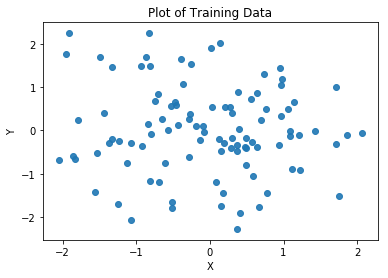

In [2]:
# set seed
np.random.seed(7)

# create dataset
y = np.random.normal(size=100).reshape(-1, 1)
x = np.random.normal(size=100).reshape(-1, 1)

# plot training data
plt.scatter(x,y,alpha=0.9)
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Plot of Training Data')
plt.show()

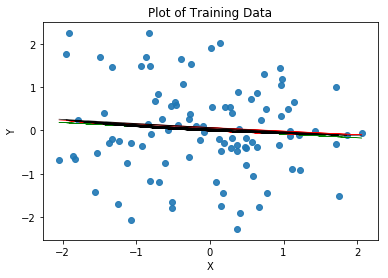

In [3]:
# simple linear regression
simple = linear_model.LinearRegression()
simple.fit(x,y)
# quadratic linear regression
x_quad = np.append(x, x**2, 1)
quad = linear_model.LinearRegression()
quad.fit(x_quad,y)
# cubic linear regression
x_cubic = np.append(x_quad, x**3, 1)
cubic = linear_model.LinearRegression()
cubic.fit(x_cubic,y)

# calculate training MSE for each model. Expect cubic to give lowest
## simple
train_simple_preds = simple.predict(x)
train_simple_mse = mean_squared_error(y, train_simple_preds)
## quad
train_quad_preds = quad.predict(x_quad)
train_quad_mse = mean_squared_error(y, train_quad_preds)
## cubic
train_cubic_preds = cubic.predict(x_cubic)
train_cubic_mse = mean_squared_error(y, train_cubic_preds)

# add each model to the training data plot
plt.scatter(x,y,alpha=0.9)
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Plot of Training Data')
plt.plot(x, train_simple_preds, color='green', linewidth=0.5)
plt.plot(x, train_quad_preds, color='red', linewidth=0.5)
plt.plot(x, train_cubic_preds, color='black', linewidth=0.5)
plt.show()

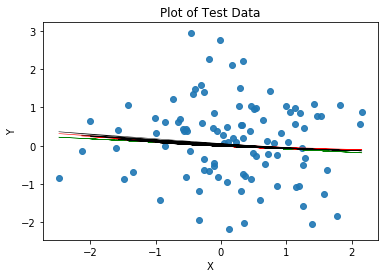

In [4]:
# calculate test MSE for each model
## create test dataset
np.random.seed(50000)
y = np.random.normal(size=100).reshape(-1, 1)
x = np.random.normal(size=100).reshape(-1, 1)


x_quad = np.append(x, x**2, 1)
x_cubic = np.append(x_quad, x**3, 1)
## test
### simple
test_simple_preds = simple.predict(x)
test_simple_mse = mean_squared_error(y, test_simple_preds)
### quad
test_quad_preds = quad.predict(x_quad)
test_quad_mse = mean_squared_error(y, test_quad_preds)
### cubic
test_cubic_preds = cubic.predict(x_cubic)
test_cubic_mse = mean_squared_error(y, test_cubic_preds)

# add each model to the test data plot
plt.scatter(x,y,alpha=0.9)
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Plot of Test Data')
plt.plot(x, test_simple_preds, color='green', linewidth=0.5)
plt.plot(x, test_quad_preds, color='red', linewidth=0.5)
plt.plot(x, test_cubic_preds, color='black', linewidth=0.5)
plt.show()

In [5]:
# create dataframe for plotting
data = [["Simple",train_simple_mse,"Train"],
        ["Simple",test_simple_mse,"Test"],
        ["Quad",train_quad_mse,"Train"],
        ["Quad",test_quad_mse,"Test"],
        ["Cubic",train_cubic_mse,"Train"],
        ["Cubic",test_cubic_mse,"Test"]]
df = pd.DataFrame(data,columns=["Model","Error_Value","Error_Type"],dtype=float)
df

,Model,Error_Value,Error_Type
0,Simple,1.030703,Train
1,Simple,1.085443,Test
2,Quad,1.030262,Train
3,Quad,1.090650,Test
4,Cubic,1.030220,Train
5,Cubic,1.093051,Test


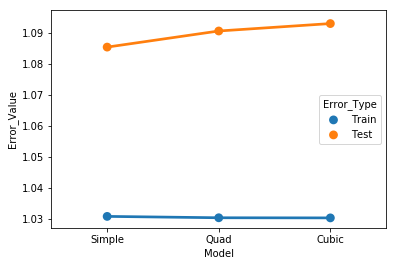

In [6]:
# plot
plot = sns.pointplot(x="Model", y="Error_Value", hue="Error_Type", data=df)

- Interpreting Results
    - As you can see, the cubic model gave the lowest train error, because it followed the training data closely. 
    - However, the simple model gave the lowest test error. 
    - This shows that the general shape of the data is linear, which means the simple model generalizes to the test data better than others.
    - This means the simple model has a low variance and bias which leads to a low test error compared to the other models.
- Building off Results
    - If the true relationship was quadratic instead, then the simple would have a higher bias which would increase the test error.
    - It would be the quadratic model that would have the lowest test error, because it would have the lowest bias and variance
    - **Again, test error really tests which model fits the shape of the data better by measuring each models' variance and bias**

## Classification Setting

For classification, we can test for accuracy by using the following formula:
$$\frac{1}{n}\sum_{i=1}^{n}(y_0 != \hat{y}_0)$$

### Bayes Classifier

 - Assigns each observation to the most likely class, given its predictor values:
 $$Pr(Y=j|X=x_0)$$
 - Classifier classifies to the class where the value for above formula is largest.
 - Bayes Error Rate: lowest possible test error:
 $$1 - E(maxPr(Y=j|X))$$
 - E() represents the probability for an instance to belong to class at each set of observation values that belong to the class j then takes the average.

### K-Nearest Neighbors (KNN)

- For each data point, KNN identifies classes of neighboring points (example below) and assign that unknown point with the majority class. If there is a tie, KNN will randomly assign.
- K represents the # of neighbors to look at.
- Must use all of training data and predict on 1 test point at a time.

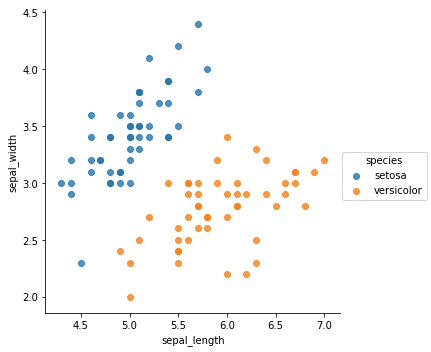

In [8]:
# get species
species = iris_data.loc[:,"species"].drop_duplicates()[0:2]
# subset data for 2 classes
df_subset = iris_data.loc[iris_data.species.isin(species),:]
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="sepal_length", y="sepal_width", data=df_subset, fit_reg=False, hue='species', legend=True)

- if K = n, then you'll always predict the class with the most training data regardless of X
    - this makes KNN less flexible which leads to *high bias* and *low variance*
- if K = 1, then you classify based on the nearest point
    - this makes KNN more flexible which leads to *low bias* (make no assumptions about the data) and *high variance* (model will change with new dataset)

<img src="fig_2_1.png" alt="Drawing" width="600"/>

Plot shows the train and test error at different k values (x-axis). Illustrates the point that to minimize the test error, you need balance of flexibility. The black dashed line indicates the Bayes error rate.